In [1]:
!pip freeze > ../requirements.txt


In [2]:
import os
import sys
sys.path.append(r'..')
from scripts.data_transformation import *
from utils.data_loaders import *
from scripts.data_analysis import *
from scripts.visualization import *


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\env\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Clean and save the data
cleaned_df = None
if not os.path.exists(r"../datasets/cleaned/analyst_ratings_cleaned.csv"):      
    analyst_ratings_df = load_analyst_ratings("../datasets/raw/raw_analyst_ratings.csv")
    # analyst_ratings_df = load_data("analyst_ratings.csv")
    analyst_ratings_df

    # Clean and preprocess the data
    cleaned_df, _ = clean_and_preprocess_data(
        analyst_ratings_df, text_columns=["headline"], date_column="date", delete_columns=["Unnamed: 0"]
    )

    cleaned_df.to_csv(r"../datasets/cleaned/analyst_ratings_cleaned.csv", index=False)

cleaned_df

In [4]:
# Load the data
dataset_path = os.path.join(r"../datasets/cleaned", "analyst_ratings_cleaned.csv")
df = load_analyst_ratings(dataset_path)
# analyst_ratings_df = load_data(dataset_path)

2024-12-15 19:30:21,961 - INFO - Loading analyst ratings from ../datasets/cleaned\analyst_ratings_cleaned.csv
2024-12-15 19:30:31,248 - INFO - Analyst ratings loaded successfully.


In [5]:
# Summarize the data
summary = summarize_data(df)

# Print the summary in a more presentable format
print("Dataset Summary:")
print(f"Shape: {summary['shape']}")
print("\nMissing Values:")
for column, missing in summary['missing_values'].items():
    print(f"{column}: {missing}")

print("\nDuplicates:")
print(summary['duplicates'])

print("\nUnique Values:")
for column, unique in summary['unique_values'].items():
    print(f"{column}: {unique}")

print("\nColumn Statistics:")
for column, stats in summary['column_stats'].items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")

Dataset Summary:
Shape: (1407327, 5)

Missing Values:
headline: 30
url: 0
publisher: 0
date: 0
stock: 0

Duplicates:
0

Unique Values:
headline: 820273
url: 883429
publisher: 1034
date: 39956
stock: 6204

Column Statistics:

headline:
  count: 1407297
  unique: 820273
  top: benzinga top upgrade
  freq: 5449

url:
  count: 1407327
  unique: 883429
  top: https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday
  freq: 1704

publisher:
  count: 1407327
  unique: 1034
  top: Paul Quintaro
  freq: 228373

date:
  count: 1407327
  unique: 39956
  top: 2020-03-12 00:00:00+00:00
  freq: 1766

stock:
  count: 1407327
  unique: 6204
  top: MRK
  freq: 3333


In [6]:
df.sort_values(by='date', ascending=False)

,headline,url,publisher,date,stock
1343657,quicken loan plan ipo report,https://www.benzinga.com/news/20/06/16238300/q...,Jason Shubnell,2020-06-11 21:12:35+00:00,WFC
980442,pg e corp report cpuc approved microgrid proposal,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 21:11:20+00:00,PCG
1269089,twitter remove account also say took account l...,https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 21:01:39+00:00,TWTR
1357563,financials energy among sector biggest selloff...,https://www.benzinga.com/news/20/06/16238109/f...,JJ Kinahan,2020-06-11 20:51:33+00:00,WMT
1039003,7 stock moving thursday session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 20:49:41+00:00,PVH
...,...,...,...,...,...
67712,charles sizemore radio interview saturday morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM
1432,going herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A
519806,update luxury sector 2nd quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT
1390005,update luxury sector 2nd quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y


In [7]:
# Top 10 active publishers
get_top_10(df['publisher'])

publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [8]:
# Top 10 stocks
get_top_10(df['stock'])

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64

In [9]:
# Analyze the type of news reported by top publishers
analyze_top_ten(df, 'publisher', 'headline')


Articles by Paul Quintaro:
209        agilent report purchase genohm term disclosed
212    update alnylam agilent deal initial term 5 yea...
213    alnylam pharma show entered manufacturing serv...
225    agilent report purchase luxcel bioscience term...
233                  agilent see q1 adj eps v sale v est
Name: headline, dtype: object

Articles by Lisa Levin:
2                   71 biggest mover friday
3            46 stock moving friday session
9     10 biggest price target change friday
10           30 stock moving friday session
15           earnings scheduled may 21 2020
Name: headline, dtype: object

Articles by Benzinga Newsdesk:
7     agilent technology share trading higher compan...
13    agilent technology share trading higher compan...
14    agilent technology q2 adj eps beat estimate sa...
18    pershing square 13f show fund raise stake agil...
20    share several healthcare company trading highe...
Name: headline, dtype: object

Articles by Charles Gross:
113    agile

In [10]:
# Check if email addresses are used as publisher names
check_email_publishers(df, column="publisher")


0
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

# Publication Time Analysis

In [11]:
# Publication Time Analysis
pub_df = column_time_analysis(df, column_name='publication', date_column='date')

articles_per_year = get_column_counts(pub_df['publication_year'], 'Articles') # Articles per Year
articles_per_month = get_column_counts(pub_df['publication_month'], 'Articles') # Articles per Month
articles_per_day = get_column_counts(pub_df['publication_day'], 'Articles') # Articles per Day
articles_per_weekday = get_column_counts(pub_df['publication_weekday'], 'Articles') # Articles per Day of the Week
articles_per_weekday_name = get_column_counts(pub_df['publication_weekday_name'], 'Articles') # Articles per Day of the Week namely
articles_per_hour = get_column_counts(pub_df['publication_hour'], 'Articles') # Articles per Hour

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\notebooks\..\scripts\data_analysis.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df[f'{column_name}_year_month'] = df[date_column].dt.to_period('M') # Extract year and month from the date


In [12]:
articles_per_year

publication_year
2009     11489
2010     81319
2011    131322
2012    122649
2013    121529
2014    134859
2015    135294
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
Name: count, dtype: int64

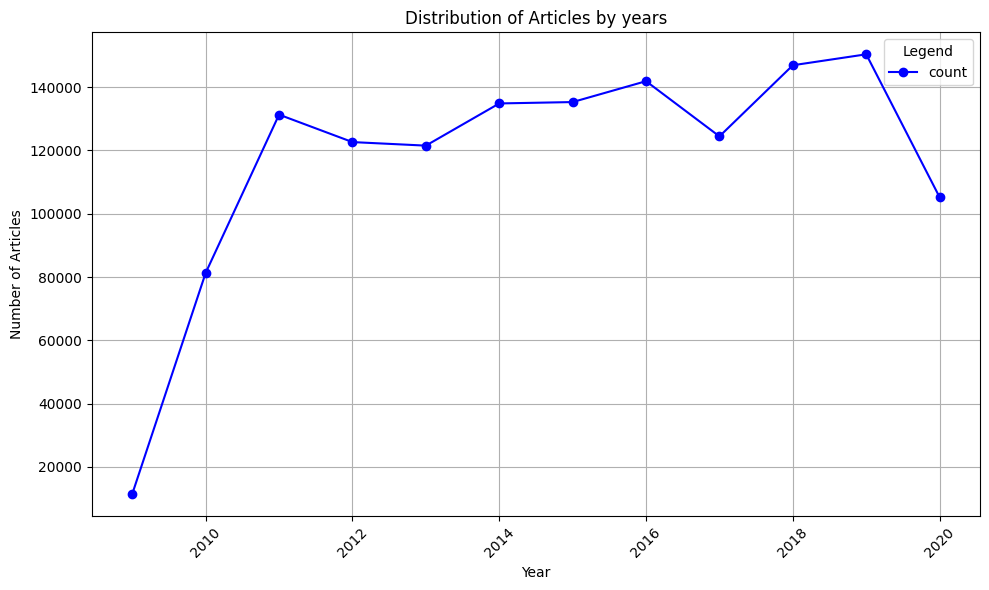

In [13]:
# Distribution of articles by years
plot_dataframe(articles_per_year, 'Distribution of Articles by years', 'Year', 'Number of Articles', color='blue')

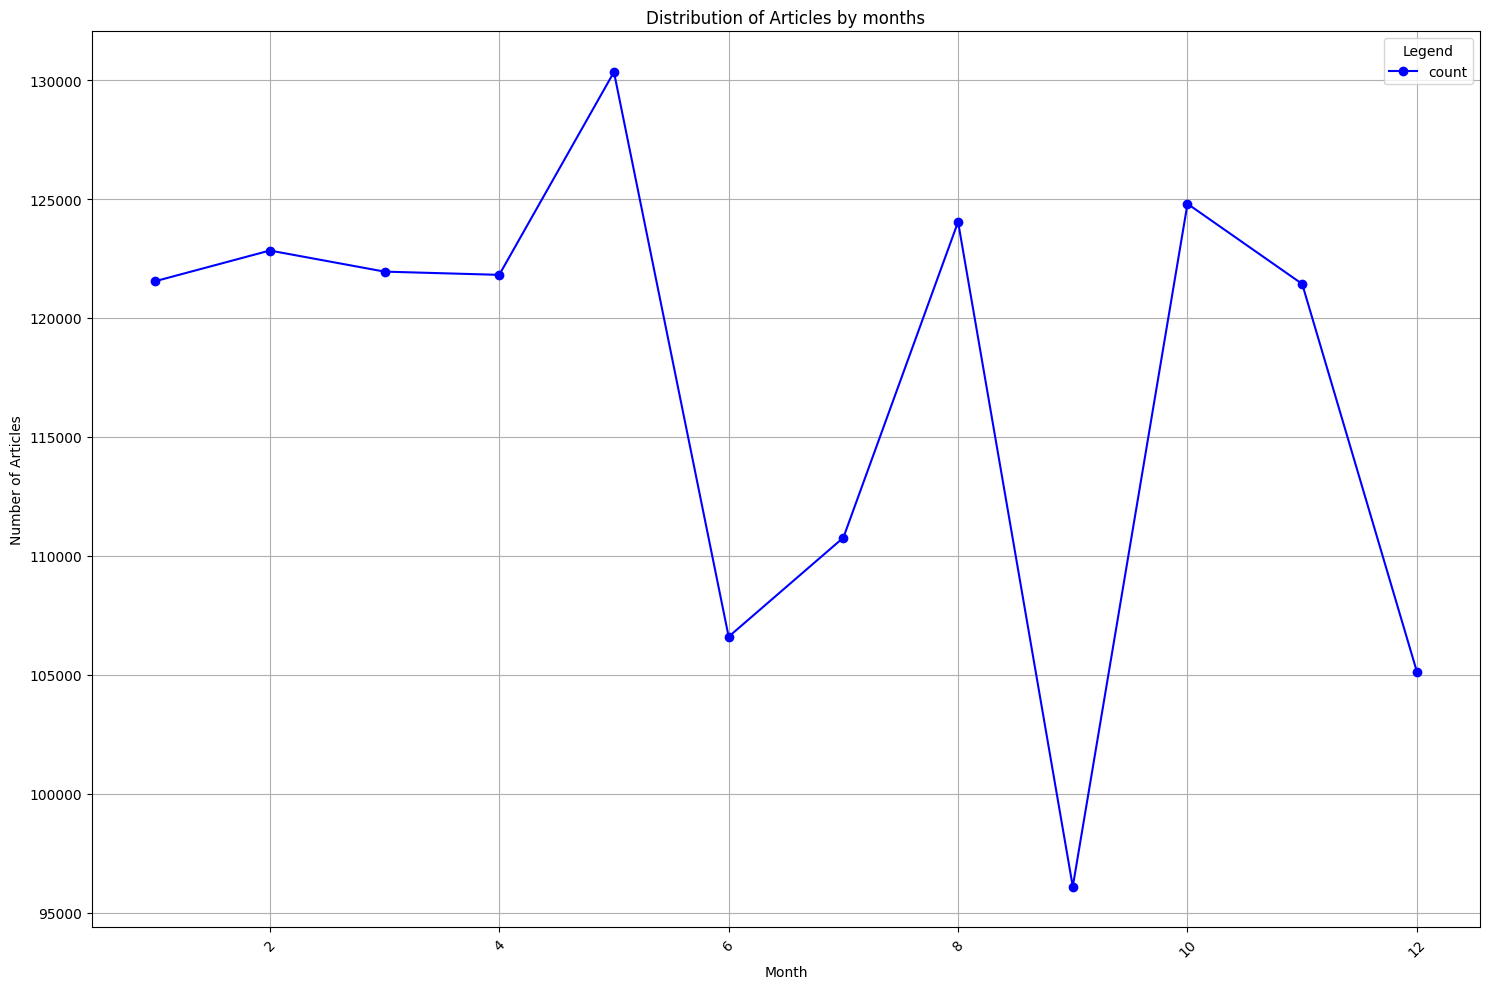

In [14]:
# Distribution of articles by months
plot_dataframe(articles_per_month, 'Distribution of Articles by months', 'Month', 'Number of Articles', color='blue', figsize=(15, 10))

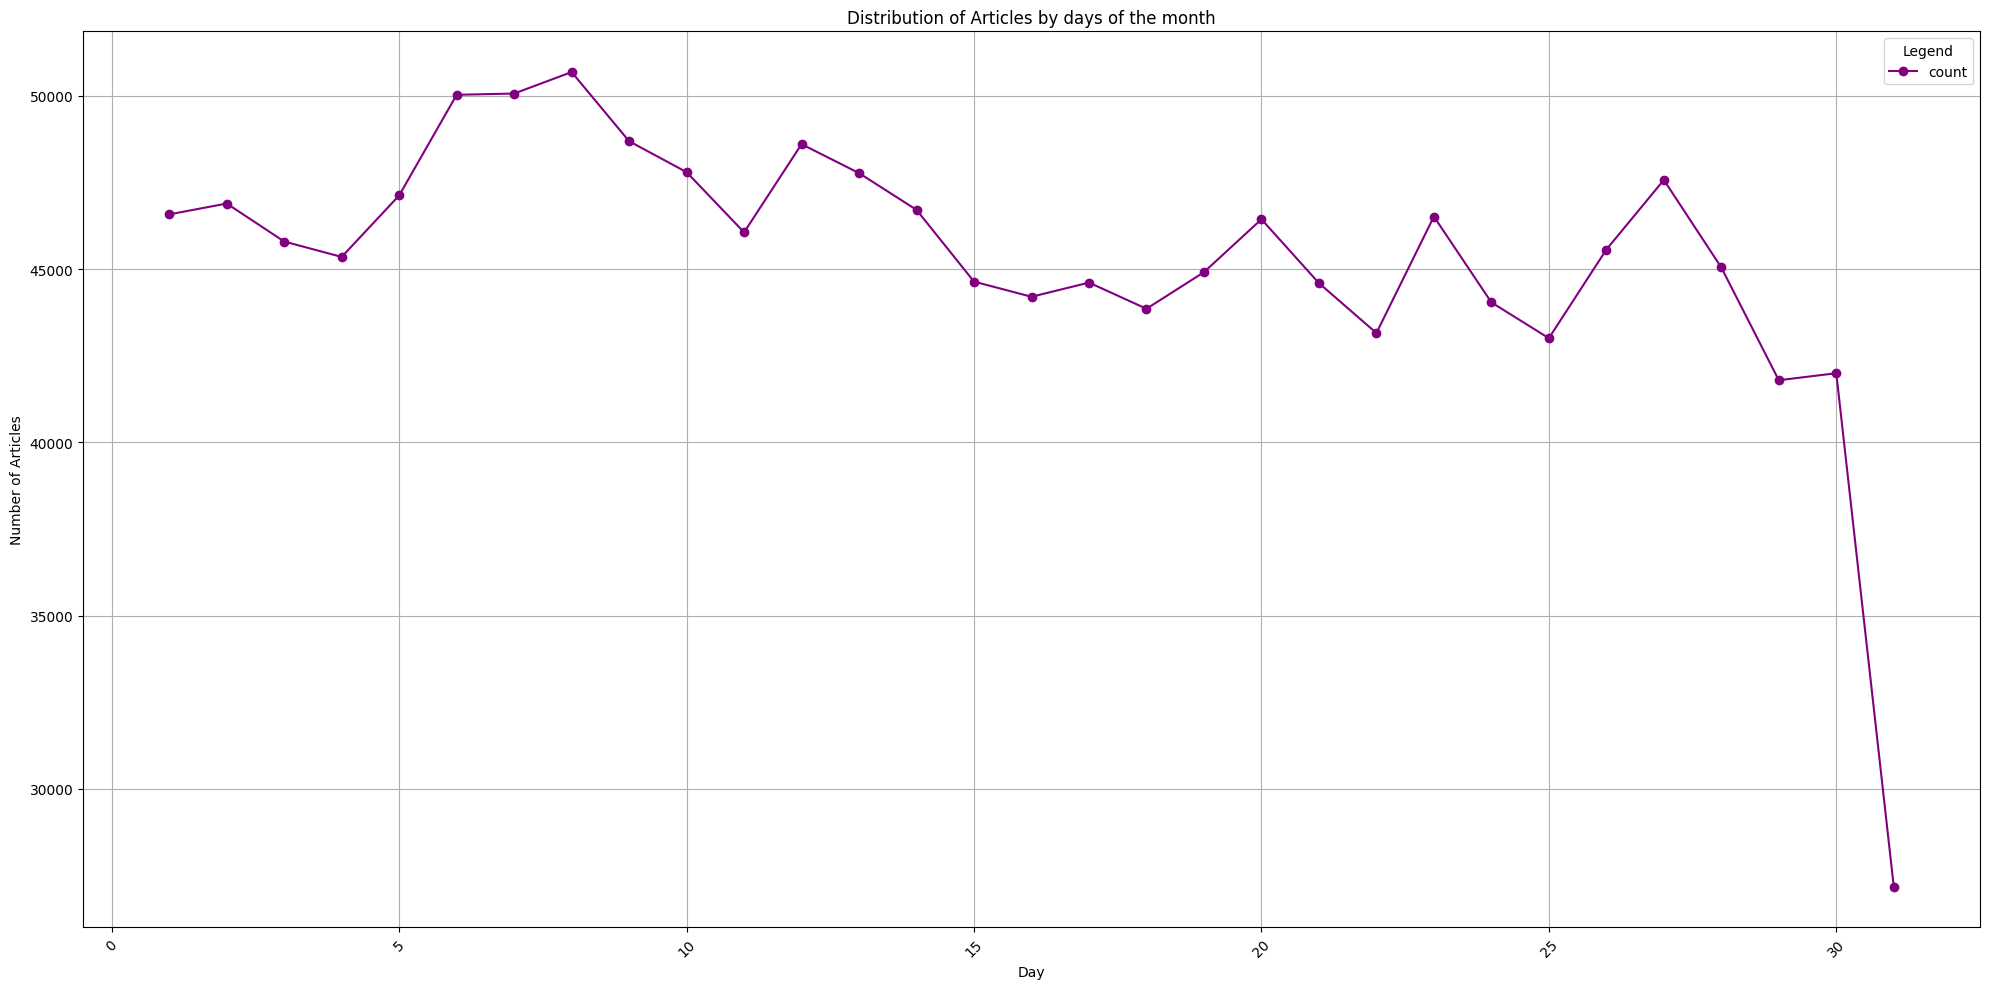

In [15]:
# Distribution of articles by days of the month
plot_dataframe(articles_per_day, 'Distribution of Articles by days of the month', 'Day', 'Number of Articles', color='purple', figsize=(20, 10))

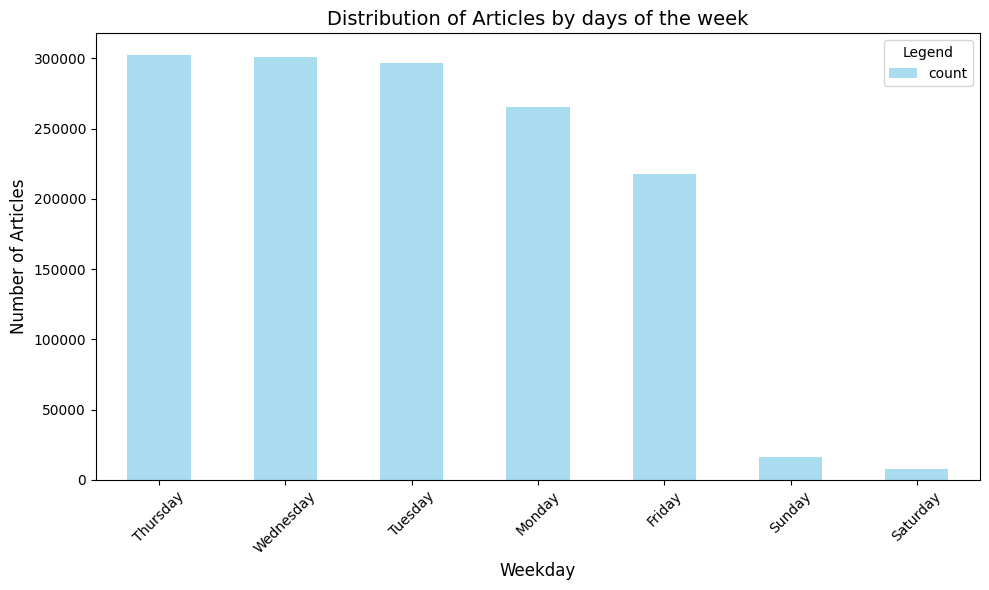

In [16]:
# Distribution of articles by days of the week
plot_bar(pub_df['publication_weekday_name'], 'Distribution of Articles by days of the week', 'Weekday', 'Number of Articles', color='skyblue')

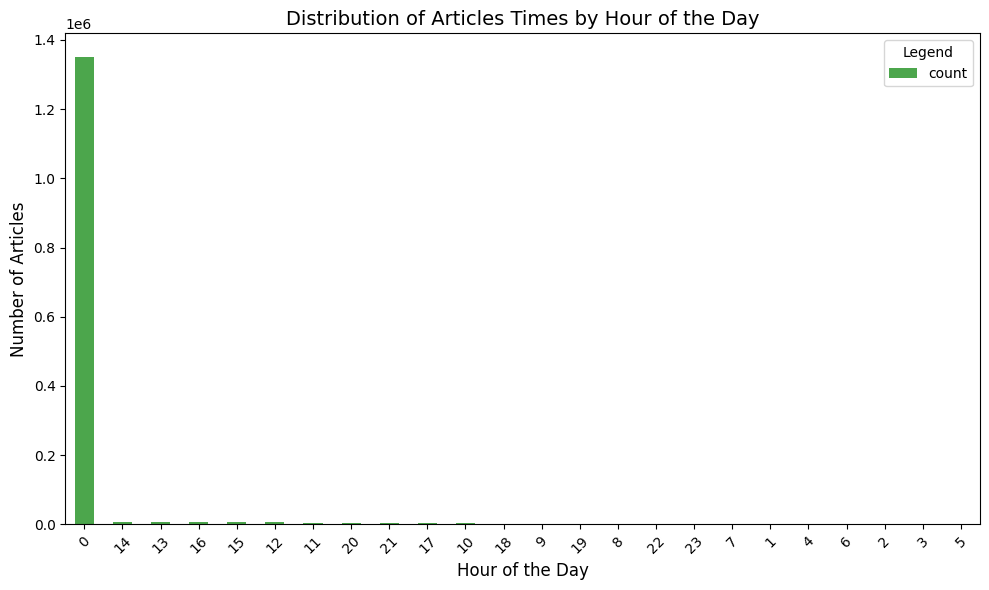

In [17]:
# Distribution of articles by hour of the Day
plot_bar(pub_df['publication_hour'], 'Distribution of Articles Times by Hour of the Day', 'Hour of the Day', 'Number of Articles', color='green')

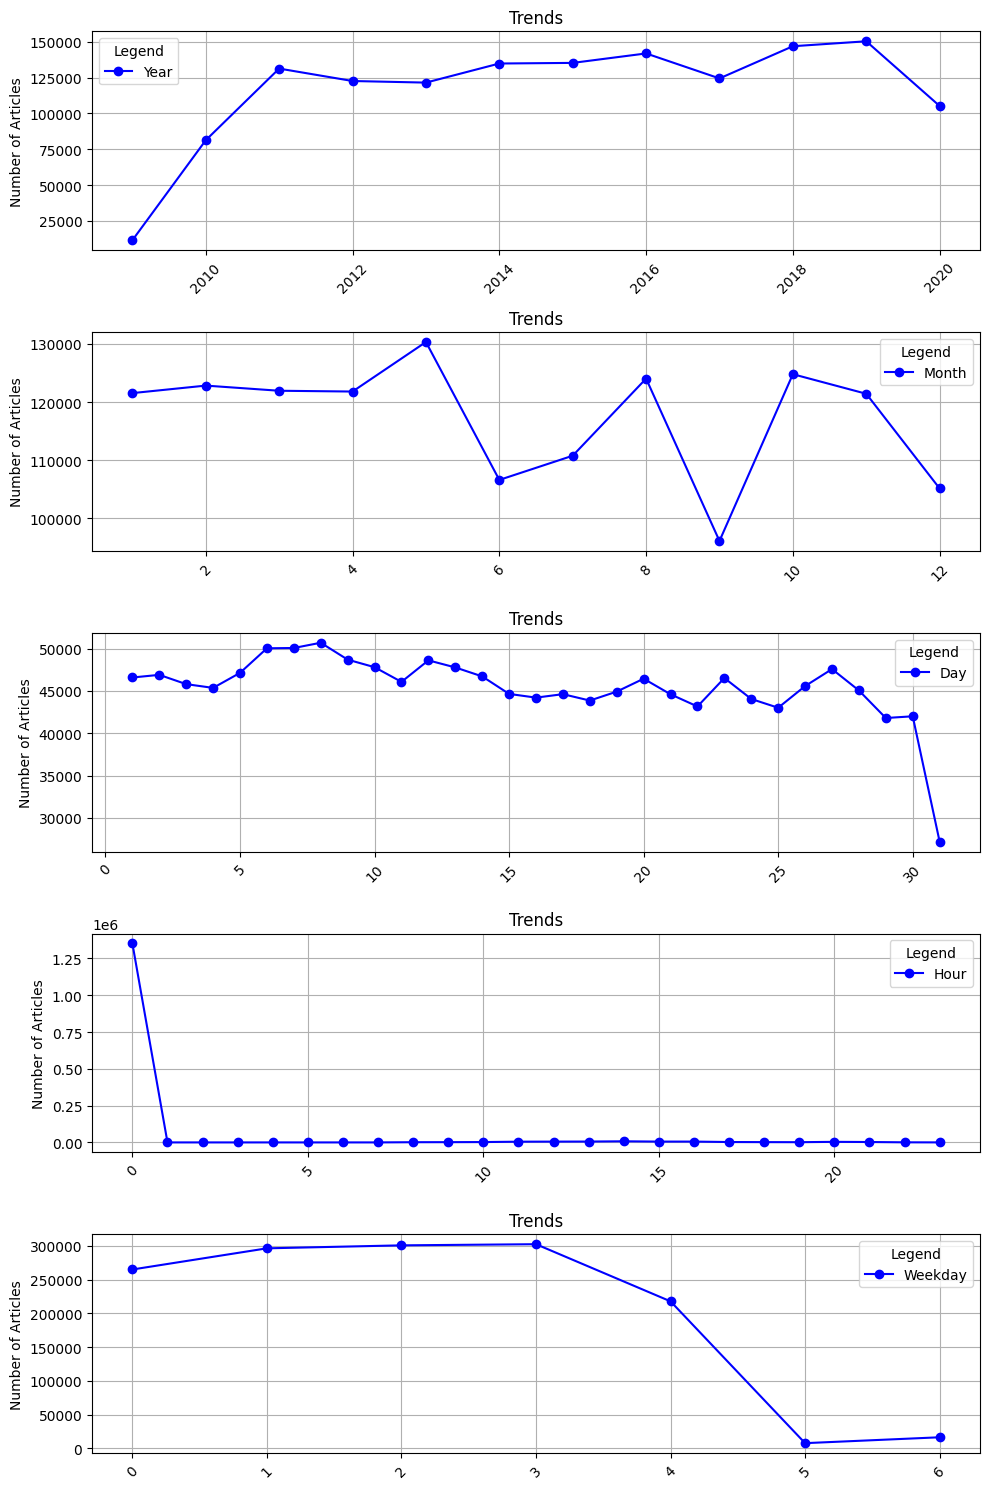

In [33]:
# Plotting the trends   
data = {
    "Year": articles_per_year,
    "Month": articles_per_month,
    "Day": articles_per_day,
    "Hour": articles_per_hour,    
    "Weekday": articles_per_weekday,
}

plot_dataframes(data=data, title='Trends', ylabel='Number of Articles', mode='line', figsize=(10, 15)) 

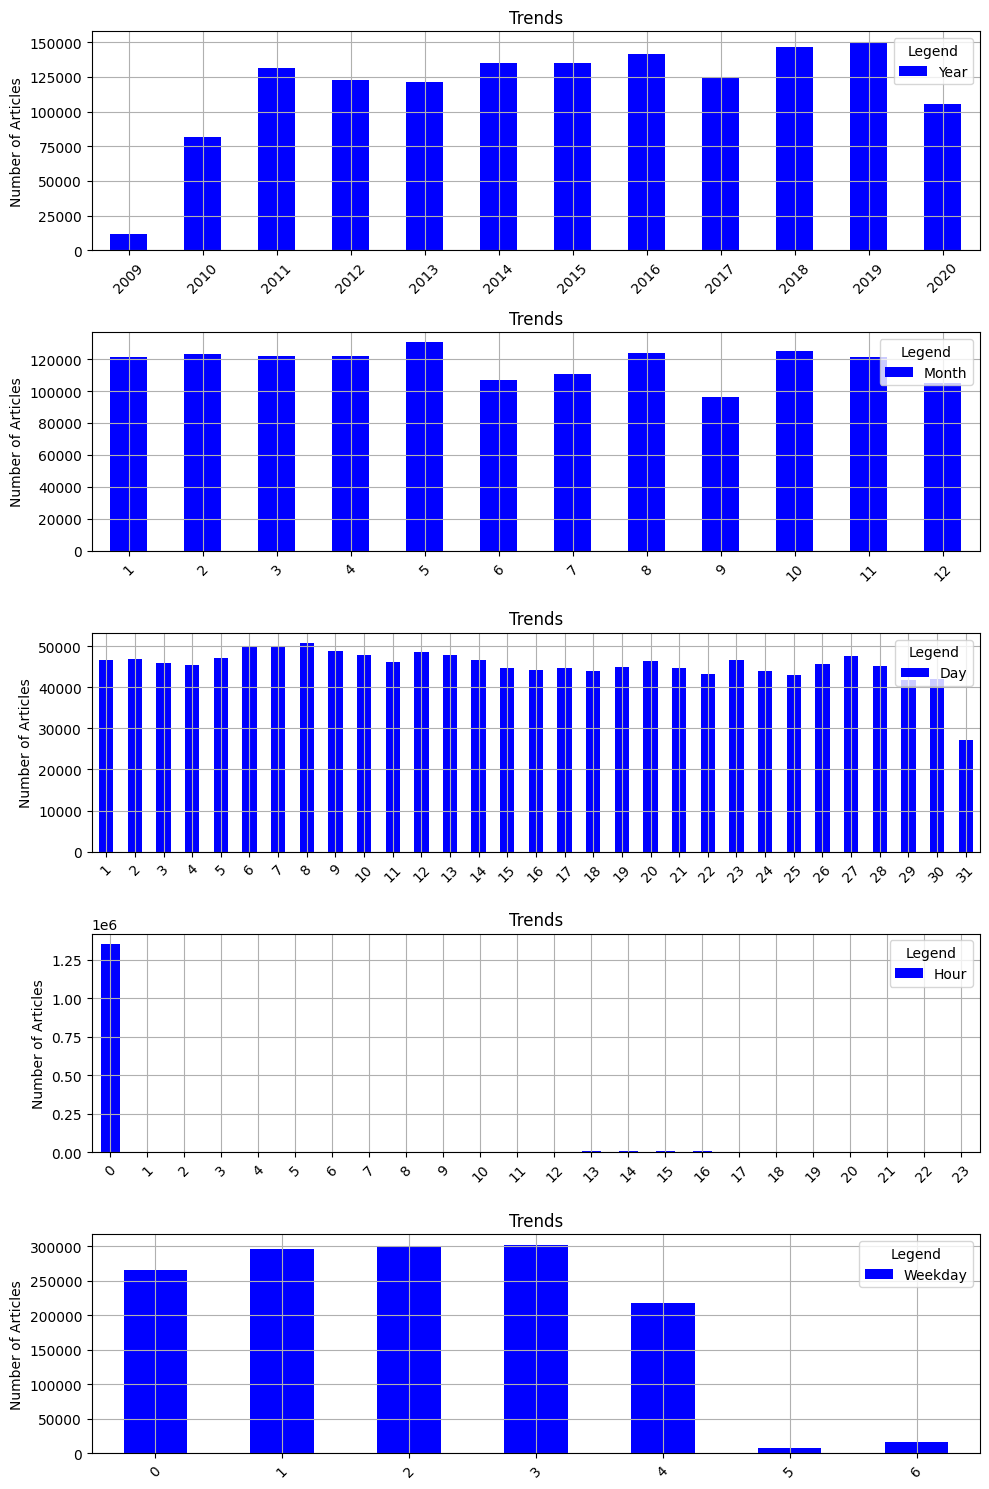

In [32]:
plot_dataframes(data=data, title='Trends', ylabel='Number of Articles', mode='bar', figsize=(10, 15)) 

<Figure size 1200x800 with 0 Axes>

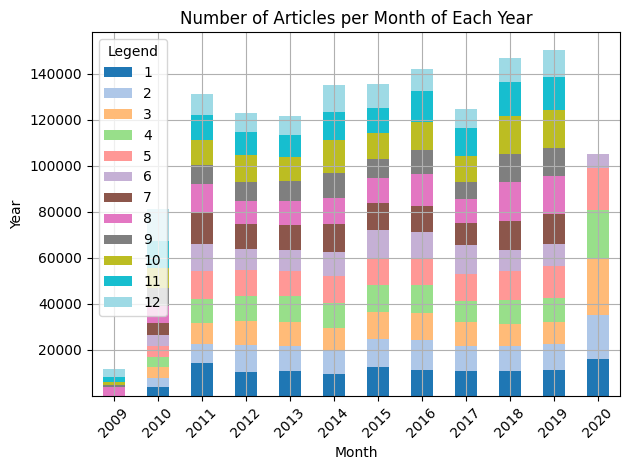

In [20]:
# Plotting the number of articles per month of each year
articles_per_month_year = df.groupby(['publication_year', f'publication_month']).size().unstack(fill_value=0) # Articles per Month of Each Year
plot_sns(articles_per_month_year, 'Number of Articles per Month of Each Year', 'Month', 'Year', figsize=(12, 8))

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\notebooks\..\scripts\visualization.py:146: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Legend')


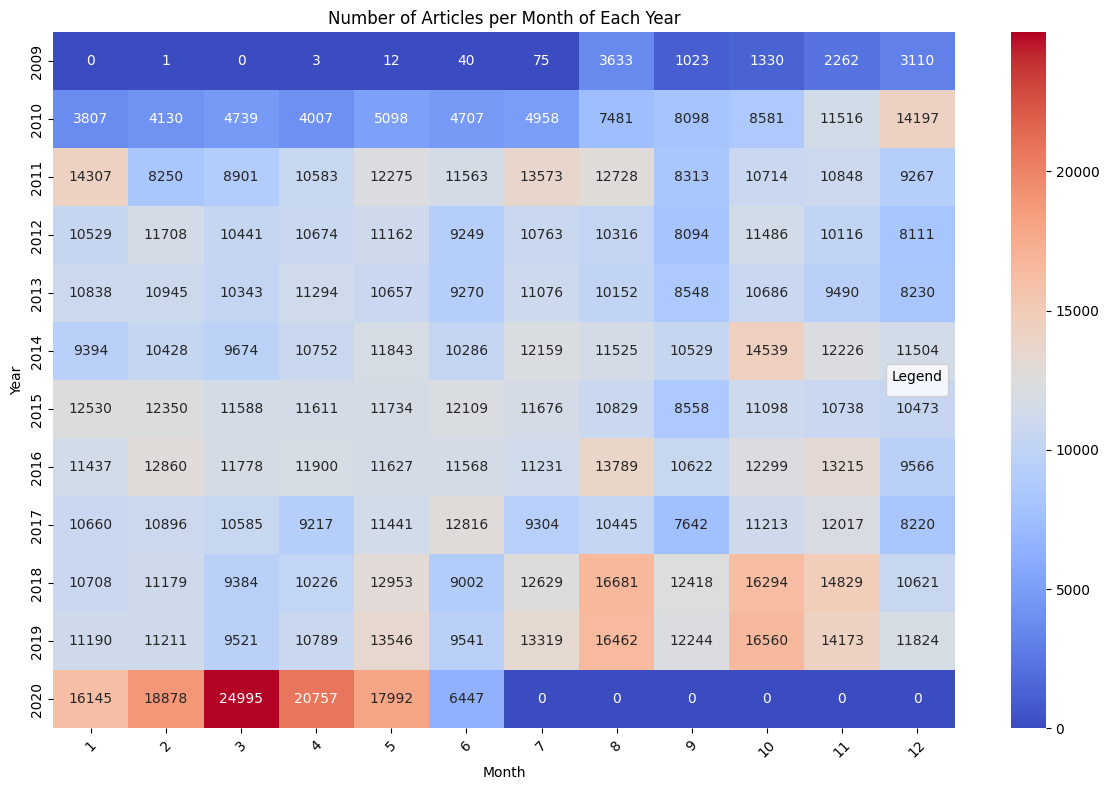

In [21]:
# Alternative plot for the number of articles per month of each year
plot_sns(articles_per_month_year, 'Number of Articles per Month of Each Year', 'Month', 'Year', mode='heatmap', figsize=(12, 8))

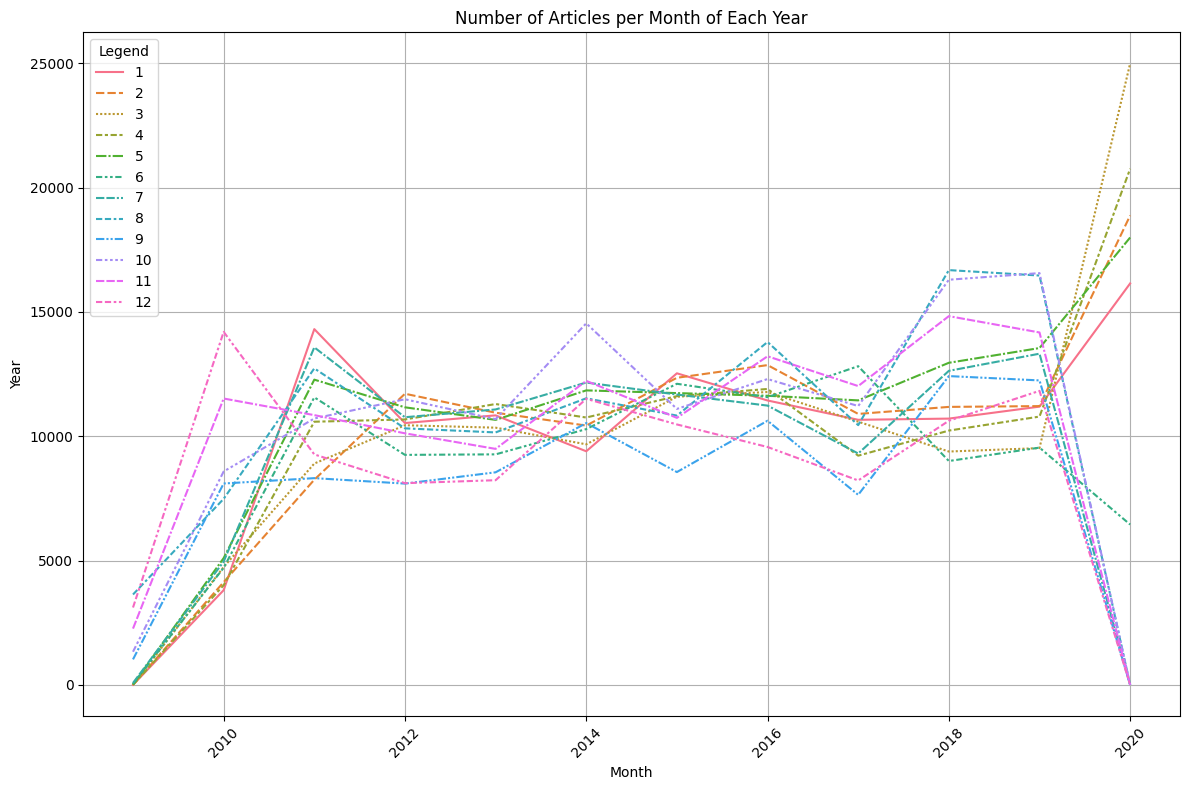

In [22]:
# Alternative plot for the number of articles per month of each year
plot_sns(articles_per_month_year, 'Number of Articles per Month of Each Year', 'Month', 'Year', mode='line', figsize=(12, 8))

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-1\notebooks\..\scripts\visualization.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Legend")


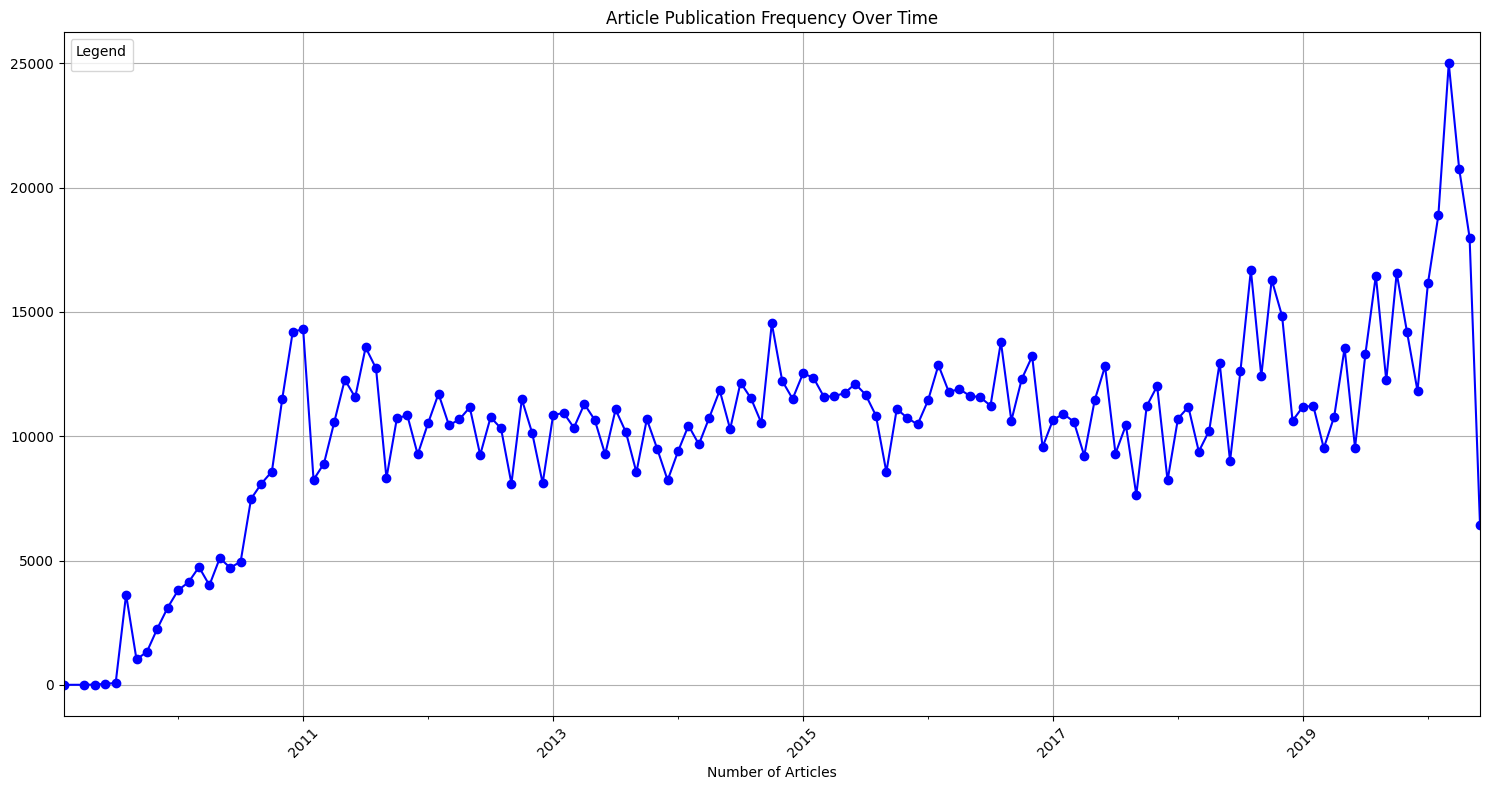

In [23]:
# Plot the publication frequency over time
publication_counts, spikes = get_counts_and_spikes(pub_df, 'Articles', 'publication_year_month')
plot_dataframe(publication_counts, 'Article Publication Frequency Over Time', 'Number of Articles', mode='line', color='blue', figsize=(15, 8))


In [24]:
spikes

publication_year_month
2020-02    18878
2020-03    24995
2020-04    20757
Freq: M, dtype: int64

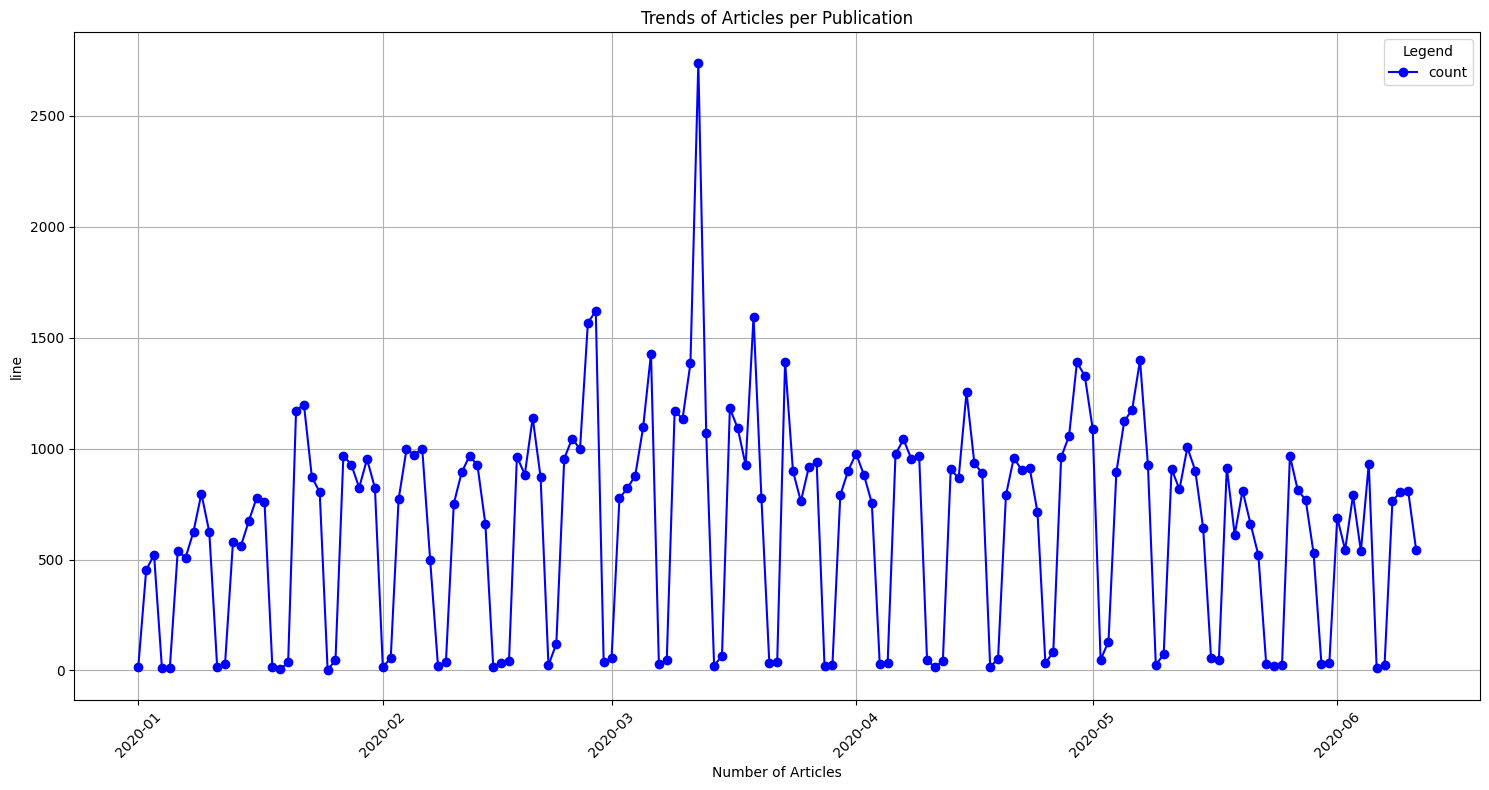

In [25]:
# Filter for a specific date range
start_date = '2020-01-01'
end_date = '2021-12-31'
event_trends = get_event_trends(df, start_date, end_date, date_column='date')
plot_dataframe(event_trends, 'Trends of Articles per Publication', 'Number of Articles', 'line', color='blue', figsize=(15, 8), grid=True)
# plot_sns(event_trends, 'Trends of Articles per Publication', 'Publications', 'line', color='blue')